In [1]:
import numpy as np
import rrcf
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
X = np.zeros((2010, 3))
X[:500,0] = 5
X[500:2000,0] = -5
X += 0.01*np.random.randn(*X.shape)

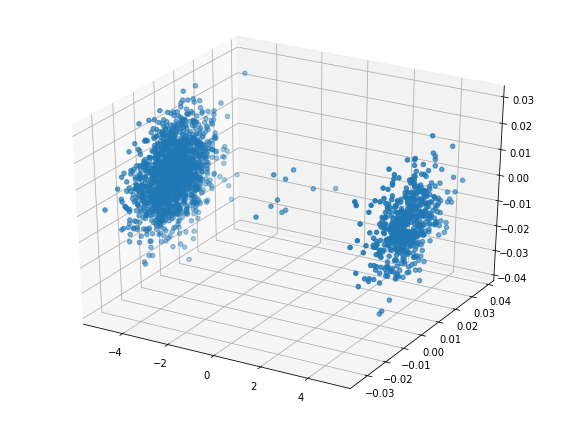

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
plt.tight_layout()

In [5]:
tree = rrcf.RCTree(X)

In [6]:
disp = pd.Series({k:tree.disp(k) for k in tree.leaves})

In [7]:
codisp = pd.Series({k:tree.codisp(k) for k in tree.leaves})

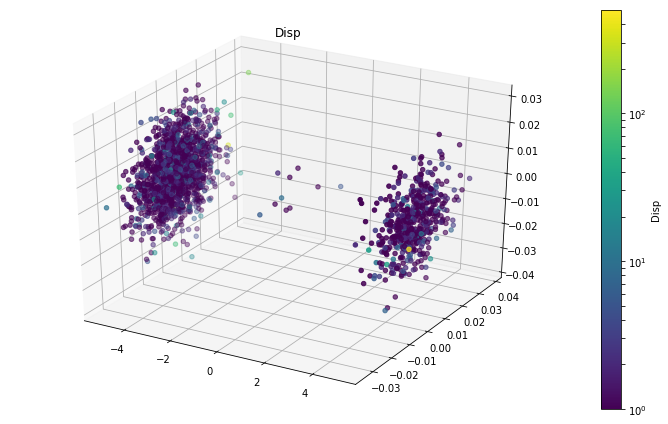

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=disp.sort_index().values,
          norm=colors.LogNorm(vmin=1, vmax=disp.max()))
plt.colorbar(sc, label='Disp')
plt.title('Disp')
plt.tight_layout()

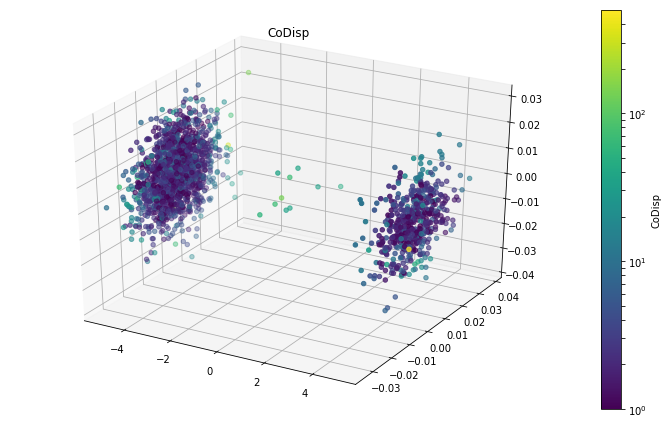

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=codisp.sort_index().values,
           norm=colors.LogNorm(vmin=1, vmax=codisp.max()))
plt.colorbar(sc, label='CoDisp')
plt.title('CoDisp')
plt.tight_layout()

In [10]:
disp = disp.sort_index()
codisp = codisp.sort_index()

In [11]:
disp[:500].mean(), disp[500:2000].mean(), disp[2000:].mean()

(3.046, 2.7333333333333334, 2.8)

In [12]:
codisp[:500].mean(), codisp[500:2000].mean(), codisp[2000:].mean()

(5.409798065142749, 4.636048794815946, 55.842072254020636)